In [2]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cwd = os.getcwd()
adata = sc.read_h5ad(cwd+'/outs/240701_kinker_anndata.h5ad')

In [6]:
def BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor='seurat')
    #sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=random_state)
    sc.tl.umap(adata, random_state=random_state)
    sc.tl.leiden(adata, random_state=random_state)
    return adata

In [8]:
adata = BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20)

/var/folders/0j/y04ny1ms5mg2smfny631m8940000gn/T/ipykernel_14454/2934595701.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=random_state)


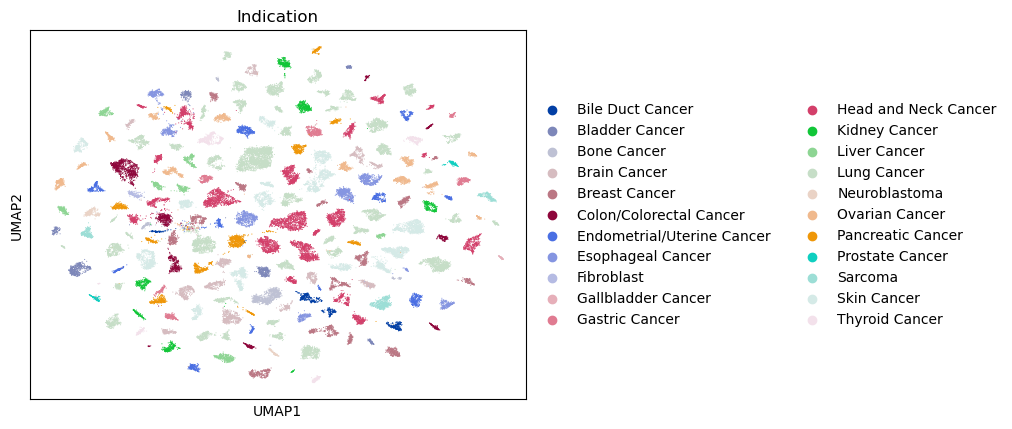

In [9]:
sc.pl.umap(adata, color=['Indication'])

In [12]:
adata.layers['counts'] = adata.X.copy()
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Bile Duct Cancer'),
  Text(1, 0, 'Bladder Cancer'),
  Text(2, 0, 'Bone Cancer'),
  Text(3, 0, 'Brain Cancer'),
  Text(4, 0, 'Breast Cancer'),
  Text(5, 0, 'Colon/Colorectal Cancer'),
  Text(6, 0, 'Endometrial/Uterine Cancer'),
  Text(7, 0, 'Esophageal Cancer'),
  Text(8, 0, 'Fibroblast'),
  Text(9, 0, 'Gallbladder Cancer'),
  Text(10, 0, 'Gastric Cancer'),
  Text(11, 0, 'Head and Neck Cancer'),
  Text(12, 0, 'Kidney Cancer'),
  Text(13, 0, 'Liver Cancer'),
  Text(14, 0, 'Lung Cancer'),
  Text(15, 0, 'Neuroblastoma'),
  Text(16, 0, 'Ovarian Cancer'),
  Text(17, 0, 'Pancreatic Cancer'),
  Text(18, 0, 'Prostate Cancer'),
  Text(19, 0, 'Sarcoma'),
  Text(20, 0, 'Skin Cancer'),
  Text(21, 0, 'Thyroid Cancer')])

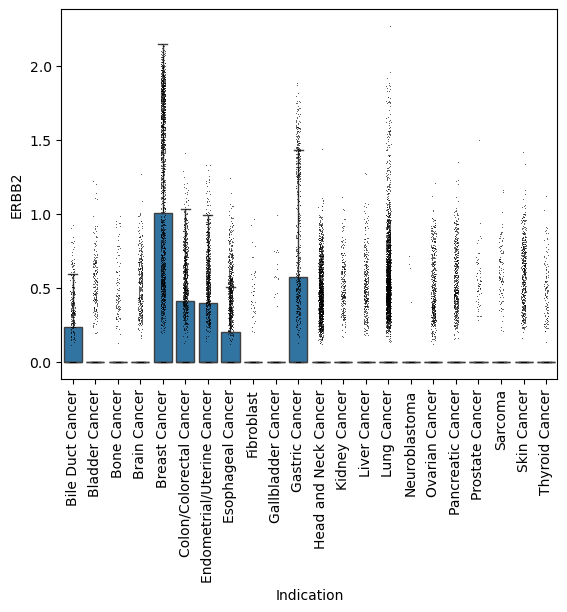

In [20]:
df = sc.get.obs_df(adata, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['Indication'] = adata.obs['Indication']
sns.boxplot(data=df, x='Indication', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='Indication', y='ERBB2', color='black', size=0.5, jitter=True)
plt.xticks(rotation=90)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BT474_BREAST'),
  Text(1, 0, 'BT549_BREAST'),
  Text(2, 0, 'CAMA1_BREAST'),
  Text(3, 0, 'EFM192A_BREAST'),
  Text(4, 0, 'HCC38_BREAST'),
  Text(5, 0, 'HCC1419_BREAST'),
  Text(6, 0, 'HCC1428_BREAST'),
  Text(7, 0, 'HDQP1_BREAST'),
  Text(8, 0, 'HMC18_BREAST'),
  Text(9, 0, 'KPL1_BREAST'),
  Text(10, 0, 'MCF7_BREAST'),
  Text(11, 0, 'MDAMB361_BREAST'),
  Text(12, 0, 'MDAMB436_BREAST'),
  Text(13, 0, 'T47D_BREAST'),
  Text(14, 0, 'ZR751_BREAST')])

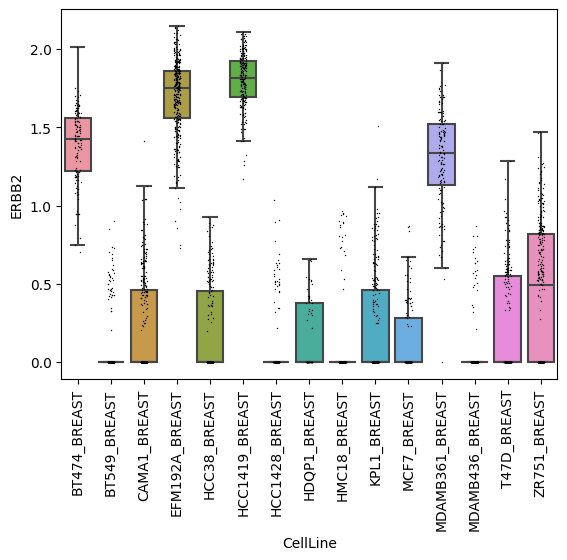

In [8]:
adata_breast = adata[adata.obs.Indication=='Breast Cancer'].copy()
df = sc.get.obs_df(adata_breast, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_breast.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'BT474_BREAST'),
  Text(1, 0, 'BT549_BREAST'),
  Text(2, 0, 'CAMA1_BREAST'),
  Text(3, 0, 'EFM192A_BREAST'),
  Text(4, 0, 'HCC38_BREAST'),
  Text(5, 0, 'HCC1419_BREAST'),
  Text(6, 0, 'HCC1428_BREAST'),
  Text(7, 0, 'HDQP1_BREAST'),
  Text(8, 0, 'HMC18_BREAST'),
  Text(9, 0, 'KPL1_BREAST'),
  Text(10, 0, 'MCF7_BREAST'),
  Text(11, 0, 'MDAMB361_BREAST'),
  Text(12, 0, 'MDAMB436_BREAST'),
  Text(13, 0, 'T47D_BREAST'),
  Text(14, 0, 'ZR751_BREAST')])

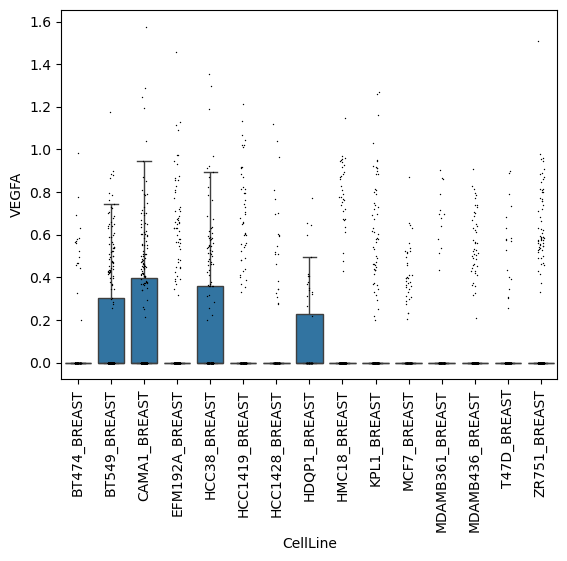

In [16]:
adata_breast = adata[adata.obs.Indication=='Breast Cancer'].copy()
df = sc.get.obs_df(adata_breast, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_breast.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='VEGFA', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='VEGFA', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'BT474_BREAST'),
  Text(1, 0, 'BT549_BREAST'),
  Text(2, 0, 'CAMA1_BREAST'),
  Text(3, 0, 'EFM192A_BREAST'),
  Text(4, 0, 'HCC38_BREAST'),
  Text(5, 0, 'HCC1419_BREAST'),
  Text(6, 0, 'HCC1428_BREAST'),
  Text(7, 0, 'HDQP1_BREAST'),
  Text(8, 0, 'HMC18_BREAST'),
  Text(9, 0, 'KPL1_BREAST'),
  Text(10, 0, 'MCF7_BREAST'),
  Text(11, 0, 'MDAMB361_BREAST'),
  Text(12, 0, 'MDAMB436_BREAST'),
  Text(13, 0, 'T47D_BREAST'),
  Text(14, 0, 'ZR751_BREAST')])

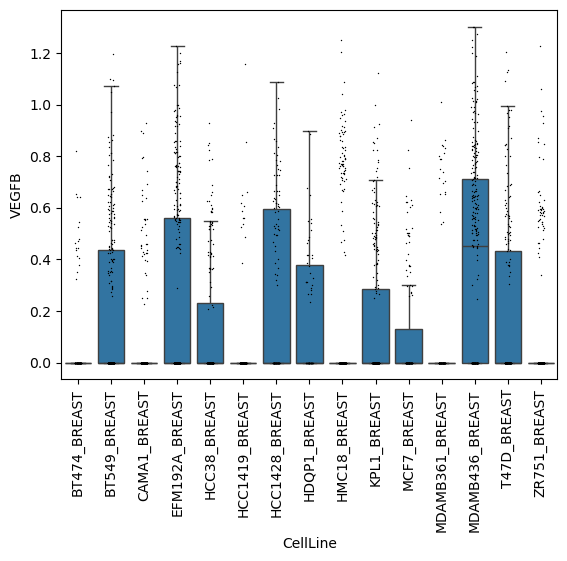

In [18]:
adata_breast = adata[adata.obs.Indication=='Breast Cancer'].copy()
df = sc.get.obs_df(adata_breast, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_breast.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='VEGFB', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='VEGFB', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2313287_STOMACH'),
  Text(1, 0, 'IM95_STOMACH'),
  Text(2, 0, 'LMSU_STOMACH'),
  Text(3, 0, 'MKN7_STOMACH'),
  Text(4, 0, 'MKN45_STOMACH'),
  Text(5, 0, 'SH10TC_STOMACH')])

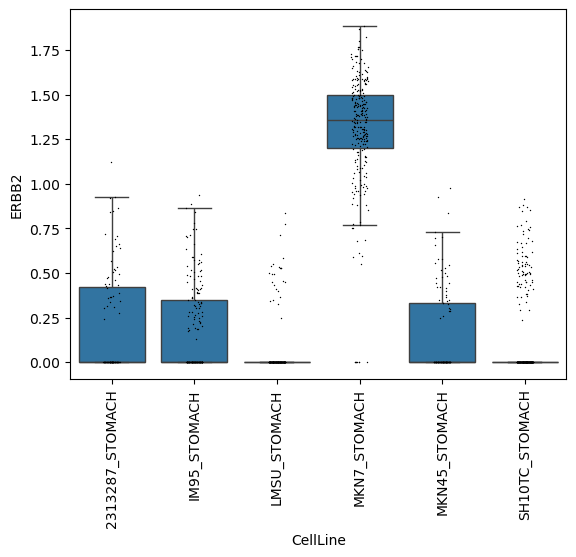

In [24]:
adata_gastric = adata[adata.obs.Indication=='Gastric Cancer'].copy()
df = sc.get.obs_df(adata_gastric, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_gastric.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'ABC1_LUNG'),
  Text(1, 0, 'ACCMESO1_PLEURA'),
  Text(2, 0, 'CALU6_LUNG'),
  Text(3, 0, 'EBC1_LUNG'),
  Text(4, 0, 'EKVX_LUNG'),
  Text(5, 0, 'HCC366_LUNG'),
  Text(6, 0, 'IALM_LUNG'),
  Text(7, 0, 'MSTO211H_PLEURA'),
  Text(8, 0, 'NCIH226_LUNG'),
  Text(9, 0, 'NCIH292_LUNG'),
  Text(10, 0, 'NCIH358_LUNG'),
  Text(11, 0, 'NCIH446_LUNG'),
  Text(12, 0, 'NCIH460_LUNG'),
  Text(13, 0, 'NCIH522_LUNG'),
  Text(14, 0, 'NCIH650_LUNG'),
  Text(15, 0, 'NCIH727_LUNG'),
  Text(16, 0, 'NCIH1048_LUNG'),
  Text(17, 0, 'NCIH1299_LUNG'),
  Text(18, 0, 'NCIH1373_LUNG'),
  Text(19, 0, 'NCIH1435_LUNG'),
  Text(20, 0, 'NCIH1568_LUNG'),
  Text(21, 0, 'NCIH1792_LUNG'),
  Text(22, 0, 'NCIH1944_LUNG'),
  Text(23, 0, 'NCIH2073_LUNG'),
  Text(24, 0, 'NCIH2077_LUNG'),
  Te

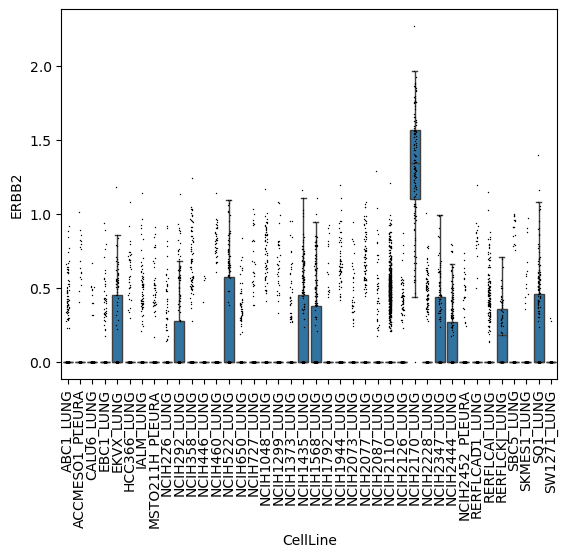

In [27]:
adata_lung = adata[adata.obs.Indication=='Lung Cancer'].copy()
df = sc.get.obs_df(adata_lung, keys=['ERBB2', 'VEGFA', 'VEGFB'], layer='log2_counts')
df['CellLine'] = adata_lung.obs['CellLine']
sns.boxplot(data=df, x='CellLine', y='ERBB2', showfliers=False)
sns.stripplot(data=df, x='CellLine', y='ERBB2', color='black', size=1, jitter=True)
plt.xticks(rotation=90)